# KNN for regression 

Yes, you have herd it right. We can also use KNN for regression and it works **often amazingly** over the standard regression models like *SGDREgressor* or *LinearRegression*. 

**2 Advantages** to use KNN:
1. Amazingly simple to understand and implement
2. Even works of the nonlinear data

Both of them are so cool! Ain't they?

## Intuation<br>—
In this method, we work to find the `k` neighbors as we do in the classification problem (which we have done in 2nd notebook) but here, in stead of ***counting*** the votes, we will use ***mean*** of the neighours. Which will help us to find the value of dependent variable.

***NOTE***: This method is not shown in the book, I am implementing myself from my understanding.

In [2]:
# Usual imports 
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

# Dataset
import seaborn as sns
mpg = sns.load_dataset("mpg")

In the mpg dataset we can use the relationship of `horsepower` and `mpg`. Where horsepower will be `X` and mpg will be `y`.

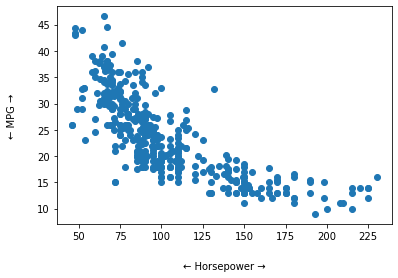

In [8]:
plt.scatter(mpg.horsepower, mpg.mpg)
plt.xlabel("← Horsepower →", labelpad=20)
plt.ylabel("← MPG →", labelpad=20);

In [35]:
mpg = mpg.dropna()

In [36]:
X = mpg["horsepower"]
y = mpg["mpg"]

In [78]:
%%writefile KNN_Reg.py
import numpy as np

class KNN_Reg:
    """
    This model is so great. It also can work on 4 different
    types of distance metrics.
    
    First time, I tried to make a model entirely in numpy.
    Haven't used a single bit of pandas. It makes numpy stronger
    and calculation faster.
    
    THIS IS FOR REGRESSION
    
    How To
    ------
    
    >>> model = KNN(X, y)
    >>> pred = model.predict(X, k=3, dis_type="euclidean")
    """
    def __init__(self, X: np.ndarray, y: list):
        X = np.array(X)
        y = np.array(y)
        if X.ndim != 2:
            raise NotImplementedError(\
            """
            The dimention of the features 
            must be 2D.
            """)
        if (len(X) != len(y)) or (y.ndim != 1):
            raise NotImplementedError(\
            """
            The length of features 
            and target mismatched.
            """)
        self.stored_X = X
        self.stored_y = y
        
    
    def predict(self, X: np.ndarray, k: int, dis_type="euclidean", p=None):
        X = np.array(X)
        self.dis_type = dis_type
        if (self.dis_type == "minkowaski") and (p == None):
            raise NotImplementedError("Please provide `p` value.")
        self.p = p    
        if X.ndim != 2:
            raise NotImplementedError(\
            """
            The dimention of the features 
            must be 2D.
            """)
        pred_values = []
        for each_row in X:
            distance = self.get_distance(row=each_row)
            sorted_k_indexes = np.argsort(distance)[:k]
            pred_value = self.stored_y[sorted_k_indexes].mean()  # JUST ← this line changed!
            pred_values.append(pred_value)
        return pred_values
    
    def get_distance(self, row):
        if self.dis_type == "euclidean":
            return ((row - self.stored_X) ** 2).sum(1) ** 0.5
        elif self.dis_type == "manhattan":
            return abs((row - self.stored_X)).sum(1)
        elif self.dis_type == "hamming":
            return abs(row - self.stored_X).sum(1) / len(row)
        elif self.dis_type == "minkowaski":
            return (abs(row - self.stored_X) ** self.p).sum(1) ** (1 / self.p)
        else:
            raise NotImplementedError(\
            f"""
            The distance type chosen is `{self.dis_type}`.
            Please choose from: 
            • euclidean
            • manhattan
            • hamming
            • minkowaski
            """)


Writing KNN_Reg.py


In [23]:
from sklearn.metrics import r2_score

## Performance On **OUR** model

In [61]:
ks = []
model = KNN_Reg(X.values[:, np.newaxis], y)
for k in range(1, 100):
    pred = model.predict(X.values[:, np.newaxis], k=k)
    ks.append(r2_score(y, pred))

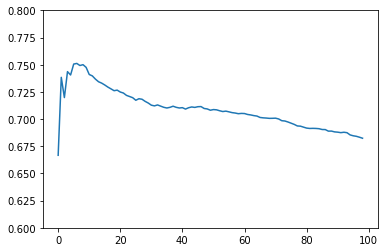

In [62]:
plt.plot(ks)
plt.ylim([0.6, .8]);

###### 

## Performance On **sklearn** model

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
ks = []
for k in range(1, 100):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X.values[:, np.newaxis], y)
    pred = model.predict(X.values[:, np.newaxis])
    ks.append(r2_score(y, pred))

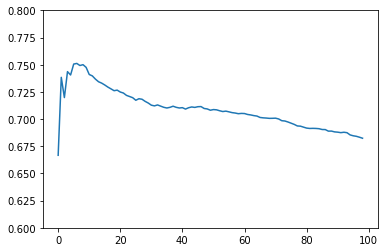

In [63]:
plt.plot(ks)
plt.ylim([0.6, .8]);

Exactly similar (well, exactly and similar can't use them together) graphs!

# 

Trying with more features

In [68]:
X = mpg[["horsepower", "acceleration", "displacement"]]
y = mpg["mpg"]

## Performance On **OUR** model

In [70]:
ks = []
model = KNN_Reg(X, y)
for k in range(1, 100):
    pred = model.predict(X, k=k)
    ks.append(r2_score(y, pred))

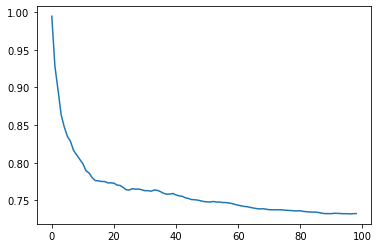

In [74]:
plt.plot(ks);

###### 

## Performance On **sklearn** model

In [75]:
ks = []
for k in range(1, 100):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, y)
    pred = model.predict(X)
    ks.append(r2_score(y, pred))

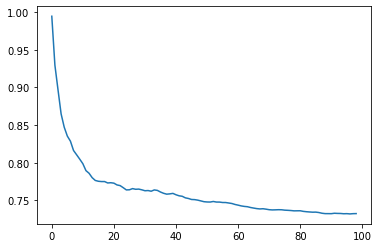

In [77]:
plt.plot(ks);

Amazing!

# 

# That's it!
Next up, I will implement the KNN for Multi Target Classification.